<a href="https://www.kaggle.com/code/chandanarprasad/analysis-of-harry-potter-books?scriptVersionId=98714109" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from collections import Counter

import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
#Reading .txt data into a variable
def read_book(title_path):
    with open(title_path, "r", encoding ="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [3]:
#Calling function to read the data
book1 = read_book('../input/harry-potter-books-corpora-part-1-7/Book1.txt')
book2 = read_book('../input/harry-potter-books-corpora-part-1-7/Book2.txt')
book3 = read_book('../input/harry-potter-books-corpora-part-1-7/Book3.txt')
book4 = read_book('../input/harry-potter-books-corpora-part-1-7/Book4.txt')
book5 = read_book('../input/harry-potter-books-corpora-part-1-7/Book5.txt')
book6 = read_book('../input/harry-potter-books-corpora-part-1-7/Book6.txt')
book7 = read_book('../input/harry-potter-books-corpora-part-1-7/Book7.txt')

character_list = pd.read_csv('../input/harry-potter-books-corpora-part-1-7/characters_list.csv')

In [4]:
#Length of books
len(book1), len(book2), len(book3), len(book4), len(book5), len(book6), len(book7)

(459169, 514948, 655473, 1149706, 1559298, 1026630, 1188915)

In [5]:
character_list.shape

(65, 3)

In [6]:
#Changing the case to lower and removing punctuations
def case_punct(book):
    book = book.lower()
    book =  ' '.join([word for word in book.split() if word.isalnum()])
    return book

book1 = case_punct(book1)
book2 = case_punct(book2)
book3 = case_punct(book3)
book4 = case_punct(book4)
book5 = case_punct(book5)
book6 = case_punct(book6)
book7 = case_punct(book7)

In [7]:
#Default English stopwords
stopwords = nltk.corpus.stopwords.words('english')

#Defining context specific stopwords
STOPWORDS = ["harry","potter","hermione","ron","j","k","rowling","s","t","said","page","professor","know","back","i","j.k","like","could",'would']
stopwords = stopwords +list(STOPWORDS)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
#Removing stopwords from the books
def remove_stopwords(book_sw):
    book_sw = ' '.join([word for word in book_sw.split() if word not in stopwords])
    return book_sw

book1_rs = remove_stopwords(book1)
book2_rs = remove_stopwords(book2)
book3_rs = remove_stopwords(book3)
book4_rs = remove_stopwords(book4)
book5_rs = remove_stopwords(book5)
book6_rs = remove_stopwords(book6)
book7_rs = remove_stopwords(book7)

In [9]:
#Getting most common term frequenices - top 20 for each book
def term_freq(book_tf):
    book_tf = Counter(book_tf.split()).most_common(20)
    return book_tf

book1_tf = term_freq(book1_rs)
print('Top 20 most common words in book1 \n',book1_tf)
book2_tf = term_freq(book2_rs)
print('Top 20 most common words in book2 \n',book2_tf)
book3_tf = term_freq(book3_rs)
print('Top 20 most common words in book3 \n',book3_tf)
book4_tf = term_freq(book4_rs)
print('Top 20 most common words in book4 \n',book4_tf)
book5_tf = term_freq(book5_rs)
print('Top 20 most common words in book5 \n',book5_tf)
book6_tf = term_freq(book6_rs)
print('Top 20 most common words in book6 \n',book6_tf)
book7_tf = term_freq(book7_rs)
print('Top 20 most common words in book7 \n',book7_tf)

Top 20 most common words in book1 
 [('stone', 389), ('philosophers', 347), ('one', 212), ('hagrid', 210), ('got', 186), ('get', 186), ('looked', 167), ('see', 142), ('going', 128), ('around', 122), ('uncle', 119), ('think', 117), ('never', 114), ('snape', 113), ('even', 102), ('something', 101), ('dudley', 96), ('look', 96), ('looking', 95), ('told', 92)]
Top 20 most common words in book2 
 [('chamber', 452), ('secrets', 401), ('got', 180), ('one', 179), ('looked', 154), ('around', 142), ('think', 136), ('lockhart', 136), ('get', 124), ('see', 123), ('looking', 115), ('still', 114), ('malfoy', 113), ('eyes', 112), ('go', 111), ('never', 108), ('though', 101), ('going', 99), ('weasley', 95), ('look', 93)]
Top 20 most common words in book3 
 [('azkaban', 512), ('prisoner', 488), ('one', 241), ('looked', 241), ('black', 223), ('lupin', 216), ('got', 211), ('around', 198), ('see', 180), ('get', 176), ('still', 172), ('looking', 165), ('going', 156), ('though', 153), ('snape', 144), ('thin

In [10]:
character_list.bio = character_list.bio.astype('string')
character_list.name = character_list.name.astype('string')
character_list.bio = character_list.bio.str.lower()
character_list.name = character_list.name.str.lower()
character_list.drop(columns=['id'],inplace=True)
character_list.head()

,name,bio
0,regulus arcturus black,brother of sirius. used to be a death eater bu...
1,sirius black,best friend of james potter and godfather of h...
2,lavender brown,killed by a werewolf. she was a gryffindor stu...
3,cho chang,ravenclaw student who dated cedric diggory and...
4,vincent crabbe sr.,father of crabbe and death-eater who escaped a...


In [11]:
#Character list where "father" is used in the bio for description
character_list[character_list['bio'].str.contains("father")]['name']

1             sirius black
4       vincent crabbe sr.
19               goyle sr.
27        frank longbottom
30    xenophilius lovegood
33           lucius malfoy
40            james potter
43          tom riddle sr.
50          arthur weasley
Name: name, dtype: string

In [12]:
#Character list where "mother" is used in the bio for description
character_list[character_list['bio'].str.contains("mother")]['name']

26    alice longbottom
34     narcissa malfoy
41         lily potter
44         mary riddle
56       molly weasley
Name: name, dtype: string

In [13]:
#Character list where "potter" is used in the bio for description
character_list[character_list['bio'].str.contains("potter")]['name']

1        sirius black
3           cho chang
31        remus lupin
38    peter pettigrew
55      ginny weasley
Name: name, dtype: string

In [14]:
#Character list where "ravenclaw" is used in the bio for description
character_list[character_list['bio'].str.contains("ravenclaw")]['name']

3         cho chang
29    luna lovegood
Name: name, dtype: string

In [15]:
#Character list where "weasley" is used in the bio for description
character_list[character_list['bio'].str.contains("weasley")]['name']

8          fleur delacour
21       hermione granger
25    bellatrix lestrange
50         arthur weasley
53           fred weasley
54         george weasley
56          molly weasley
Name: name, dtype: string

In [16]:
def make_wordcloud(book_wc):
    wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book1)
                     
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0) 
    plt.show()
    return (book_wc)

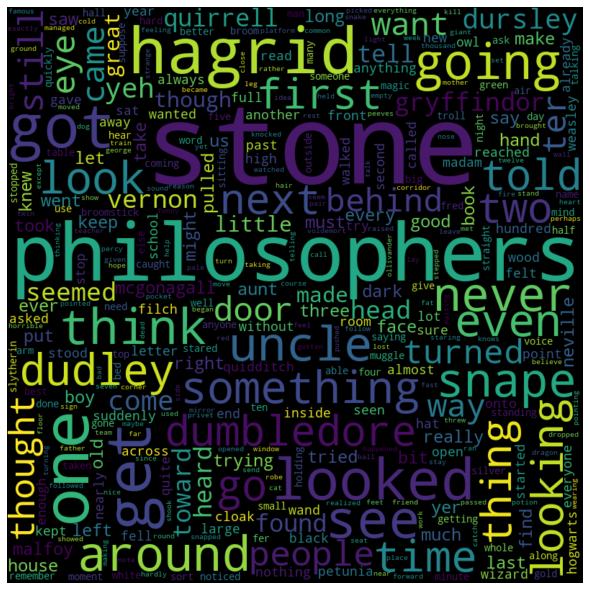

[('stone', 389),
 ('philosophers', 347),
 ('one', 212),
 ('hagrid', 210),
 ('got', 186),
 ('get', 186),
 ('looked', 167),
 ('see', 142),
 ('going', 128),
 ('around', 122),
 ('uncle', 119),
 ('think', 117),
 ('never', 114),
 ('snape', 113),
 ('even', 102),
 ('something', 101),
 ('dudley', 96),
 ('look', 96),
 ('looking', 95),
 ('told', 92)]

In [17]:
make_wordcloud(book1_tf)

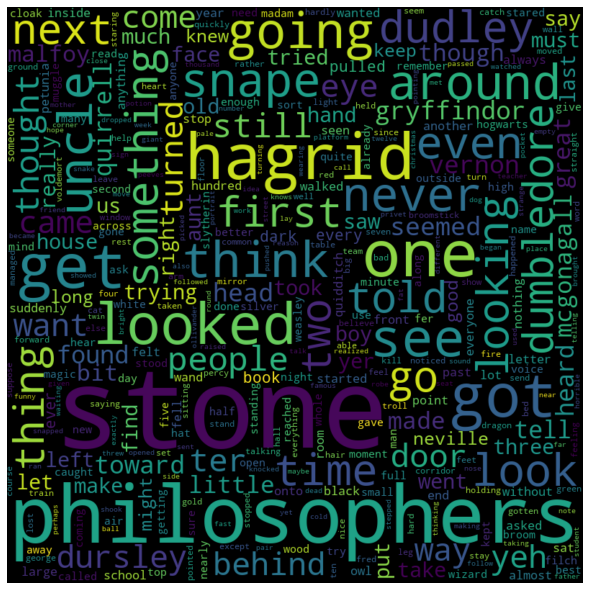

[('chamber', 452),
 ('secrets', 401),
 ('got', 180),
 ('one', 179),
 ('looked', 154),
 ('around', 142),
 ('think', 136),
 ('lockhart', 136),
 ('get', 124),
 ('see', 123),
 ('looking', 115),
 ('still', 114),
 ('malfoy', 113),
 ('eyes', 112),
 ('go', 111),
 ('never', 108),
 ('though', 101),
 ('going', 99),
 ('weasley', 95),
 ('look', 93)]

In [18]:
make_wordcloud(book2_tf)

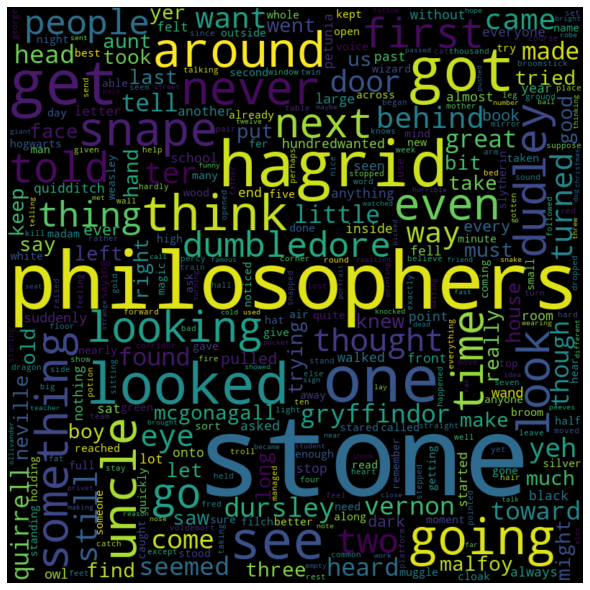

[('azkaban', 512),
 ('prisoner', 488),
 ('one', 241),
 ('looked', 241),
 ('black', 223),
 ('lupin', 216),
 ('got', 211),
 ('around', 198),
 ('see', 180),
 ('get', 176),
 ('still', 172),
 ('looking', 165),
 ('going', 156),
 ('though', 153),
 ('snape', 144),
 ('think', 142),
 ('eyes', 134),
 ('saw', 134),
 ('toward', 132),
 ('go', 121)]

In [19]:
make_wordcloud(book3_tf)

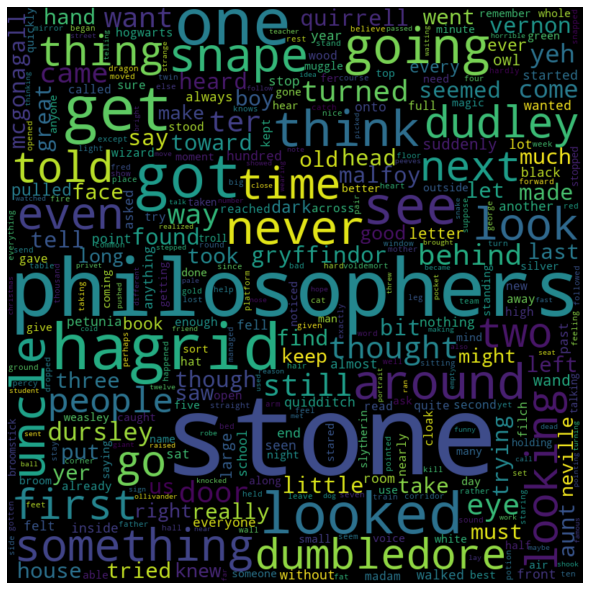

[('fire', 861),
 ('goblet', 860),
 ('looked', 485),
 ('around', 411),
 ('got', 403),
 ('one', 401),
 ('though', 359),
 ('dumbledore', 329),
 ('looking', 323),
 ('see', 293),
 ('get', 288),
 ('still', 270),
 ('going', 265),
 ('eyes', 237),
 ('saw', 225),
 ('hagrid', 221),
 ('weasley', 209),
 ('told', 205),
 ('look', 203),
 ('go', 199)]

In [20]:
make_wordcloud(book4_tf)

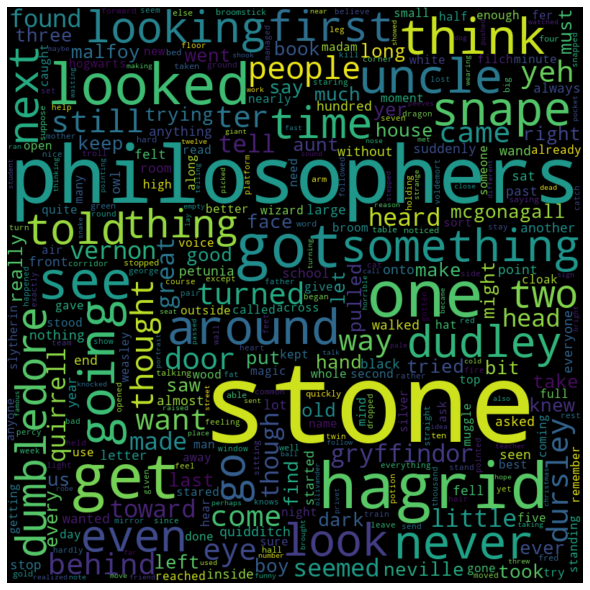

[('order', 1174),
 ('phoenix', 1125),
 ('looked', 533),
 ('got', 484),
 ('around', 461),
 ('though', 446),
 ('looking', 446),
 ('one', 406),
 ('still', 382),
 ('think', 378),
 ('dumbledore', 364),
 ('see', 359),
 ('sirius', 359),
 ('going', 358),
 ('get', 348),
 ('umbridge', 309),
 ('behind', 294),
 ('weasley', 283),
 ('toward', 265),
 ('thought', 264)]

In [21]:
make_wordcloud(book5_tf)

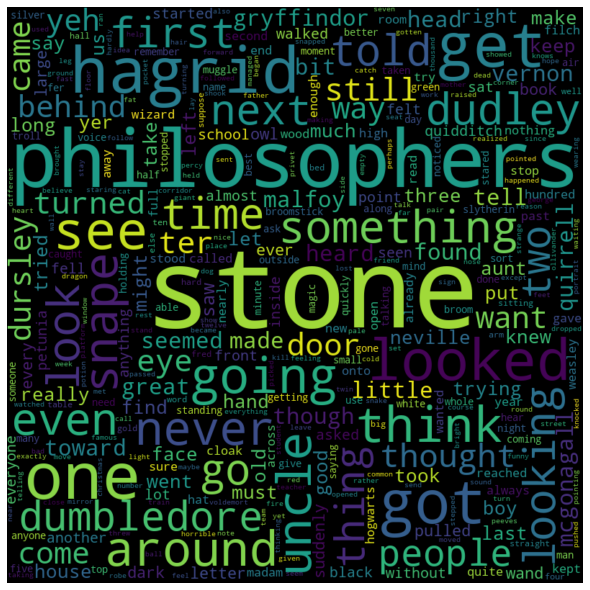

[('half', 781),
 ('blood', 764),
 ('prince', 761),
 ('dumbledore', 555),
 ('looked', 328),
 ('one', 314),
 ('think', 312),
 ('though', 271),
 ('got', 263),
 ('see', 242),
 ('around', 242),
 ('looking', 241),
 ('still', 241),
 ('slughorn', 235),
 ('malfoy', 231),
 ('thought', 222),
 ('snape', 222),
 ('little', 220),
 ('get', 206),
 ('seemed', 203)]

In [22]:
make_wordcloud(book6_tf)

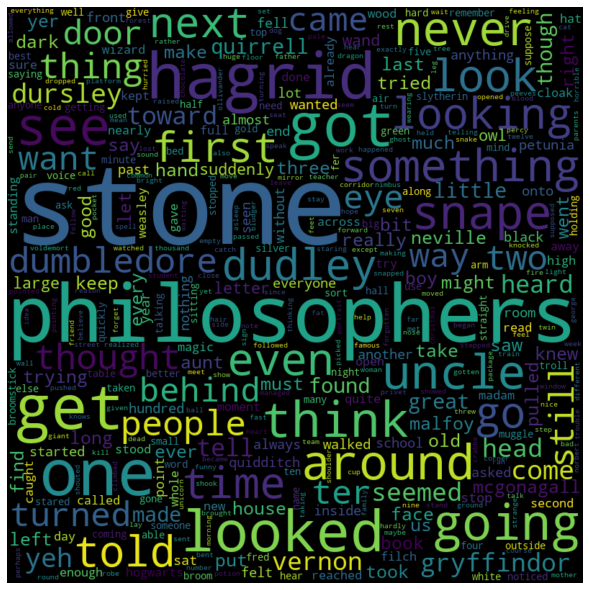

[('deathly', 887),
 ('hallows', 881),
 ('looked', 426),
 ('one', 370),
 ('dumbledore', 353),
 ('wand', 351),
 ('still', 319),
 ('around', 302),
 ('think', 293),
 ('got', 278),
 ('get', 263),
 ('saw', 261),
 ('seemed', 257),
 ('death', 251),
 ('little', 244),
 ('knew', 242),
 ('voldemort', 241),
 ('asked', 228),
 ('thought', 228),
 ('looking', 227)]

In [23]:
make_wordcloud(book7_tf)